In [1]:
# import packages 
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import loadmat


In [2]:
from datetime import datetime
current_date = datetime.now()
formatted_date = current_date.strftime("%Y.%m.%d")

root = '/Users/grantongo/Desktop/nature methods/figures'

TAK1
IKK-beta
NFKB (RELB)
NFKB3-p65 (RELA)
P38
IkB-alpha/ NFKBIA
IKK-gamma/NEMO


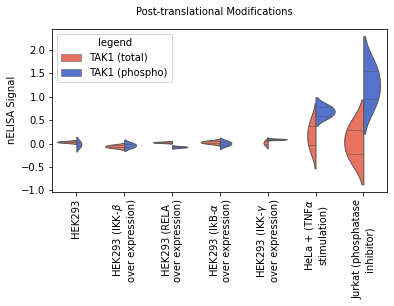

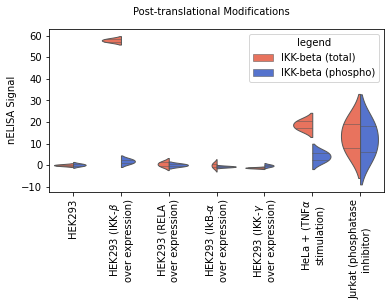

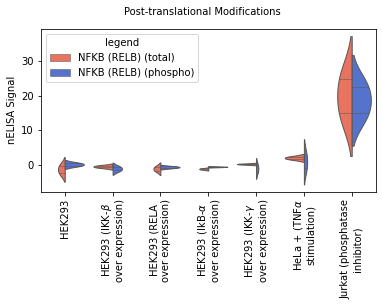

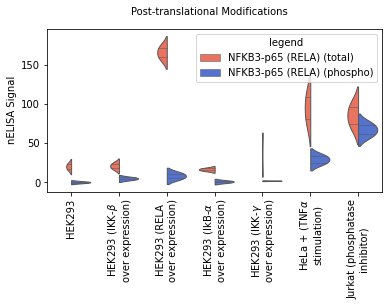

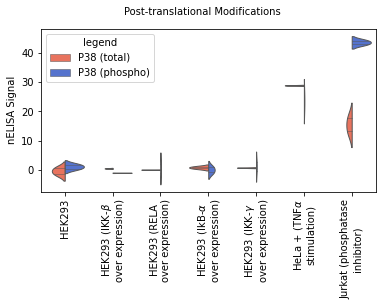

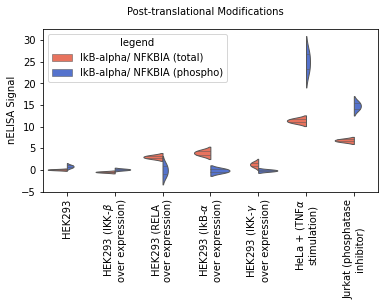

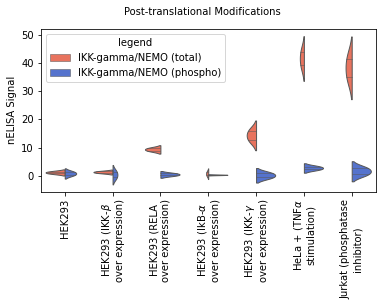

In [41]:
# figure 1d: post-translational modifications 

df = pd.read_csv(f'{root}/data ptm intracellular/data_ptm_intracellular.csv')

# select CLAMPs
ptm_pairs = ['CL-7.T.15.2','CL-7.P.8.1',
             'CL-3.T.3.2','CL-3.P.2.1',
             'CL-5.T.7.2','CL-5.P.2.1',
             'CL-8.T.4.2','CL-8.P.11.1',
             'CL-2.T.1.2','CL-2.P.6.1',
             'CL-9.T.4.2','CL-9.P.4.1',
             'CL-11.T.4.2','CL-11.P.2.1']
ptm_targets = set(df['ptm_target'])
ptm_samples = set(df['sample'])

order = ['HEK293',
         'HEK293 (IKK-$\\beta$\nover expression)',
         'HEK293 (RELA\nover expression)',
         'HEK293 (IkB-$\\alpha$\nover expression)',
         'HEK293 (IKK-$\\gamma$\nover expression)',
         'HeLa + (TNF$\\alpha$\nstimulation)',
         'Jurkat (phosphatase\ninhibitor)',
        ]
for target in df.ptm_target.unique():
    
    df_ptm = df[(df['clamp'].isin(ptm_pairs)) & 
            (df['ptm_target']==target)].dropna()
    
    if not df_ptm.empty: 
        print(target)
        fig, ax = plt.subplots(1,1,figsize=(6,3), gridspec_kw={'wspace':0.2, 'hspace':0.4})
        fig.suptitle('Post-translational Modifications',fontsize=10)

        ax = sbn.violinplot(data=df_ptm, 
                         x='cell_sample',
                         y='value',
                         hue='legend',
                         split=True,
                         gap=0.1,
                         inner="stick",
                         order=order,
                         alpha=0.5,
                         linewidth=1,
                         density_norm="count",
                         palette=['tomato','royalblue'],
                         ax=ax)
        ax.tick_params(axis='x', rotation=90)
        ax.set_xlabel('')
        ax.set_ylabel('nELISA Signal')
        #ax.set_ylim(-9,70)
        #ax.legend_.remove()

        df_ptm.to_csv(f'{root}/figure si.4 (ppi and ptm)/data_figure.si.4_ptm_{target.replace("/","")}_{formatted_date}.csv')
        fig.savefig(f'{root}/figure si.4 (ppi and ptm)/png_figure.si.4_ptm_{target.replace("/","")}_{formatted_date}.png',bbox_inches='tight',dpi=200)
        fig.savefig(f'{root}/figure si.4 (ppi and ptm)/svg_figure.si.4_ptm_{target.replace("/","")}_{formatted_date}.svg',bbox_inches='tight')

In [42]:
df_agpools = pd.read_csv(f'{root}/data/calibration standard/ag_pools.csv')
df_metadata = pd.read_csv(f'{root}/data/calibration standard/cali_metadata.csv')

data = loadmat(f'{root}/data/calibration standard/_KR1319_600plexAgPool_dump.mat')
sensors = [row[0][0] for row in data['nelSensorShorthand']][0:623]

df_snr = pd.DataFrame(data['SNR'][0][0])
df_snr.columns = sensors

df = pd.concat([df_metadata,df_snr], axis=1)

/opt/homebrew/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [43]:
# check antigen pools 
plot_sensors = ['75.2_IL-12 p40_v1','76.1_IL-12 p70_v1','90.1_IL-23_v1']
df_agpools[df_agpools['nelSensorShorthand'].isin(plot_sensors)]

,nelSensorShorthand,target,antigen pool,uniprotid_1,uniprotid_2
1,75.2_IL-12 p40_v1,IL-12 p40,4,P29460,NaN
2,76.1_IL-12 p70_v1,IL-12 p70,5,P29459,NaN
4,90.1_IL-23_v1,IL-23,2,Q9NPF7,NaN


In [44]:
# figure: protein-protein interactions

df['antigen_in_sample'] = df['pool'].map({'2':'IL-23', 
                                          '4':'IL-12 p40',
                                          '5':'IL-12 p70'})
df = df.dropna(subset='antigen_in_sample')

id_vars = ['plate_name', 'position', 'sample', 'pool','concentration', 'concentration_unit', 'antigen_in_sample']

df = df[id_vars + plot_sensors]
df = df.rename(columns = {'75.2_IL-12 p40_v1':'IL-12 p40',
                          '76.1_IL-12 p70_v1':'IL-12 p70',
                          '90.1_IL-23_v1':'IL-23'})

df.to_csv(f'{root}/data/calibration standard/df_cali_IL23.IL12.p40.p70_{formatted_date}.csv')

antigens = ['IL-12 p40', 'IL-12 p70', 'IL-23']

df = df.melt(id_vars=id_vars, value_vars=antigens)
df['concentration'] = df['concentration'].astype('float')*1000 #convert from ng/mL to pg/mL

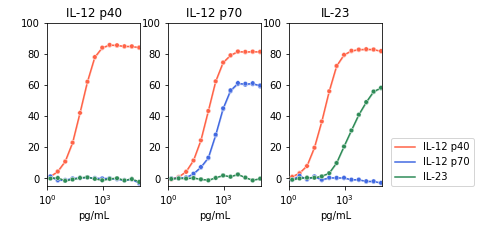

In [45]:

fig, ax = plt.subplots(1,3,figsize=(6,3), gridspec_kw={'wspace':0.3, 'hspace':0.4})
ax = ax.ravel()

for antigen, i in zip(antigens, range(0,len(antigens))):
    ax[i] = sbn.lineplot(data=df[df['antigen_in_sample'].isin([antigen])], 
                         x='concentration',
                         y='value',
                         hue='variable',
                         palette=['tomato','royalblue','seagreen'],
                         ax=ax[i]
                        )
    ax[i] = sbn.scatterplot(data=df[df['antigen_in_sample'].isin([antigen])], 
                         x='concentration',
                         y='value',
                         hue='variable',
                         marker='o',
                         s=20,
                         palette=['tomato','royalblue','seagreen'],
                         ax=ax[i],
                         zorder=100,
                         legend=None
                        )
    ax[i].set_title(antigen)
    ax[i].set_xscale('log')
    ax[i].set_xlabel('pg/mL')
    ax[i].set_ylabel(' ')
    ax[i].set_ylim(-5,100)
    ax[i].set_xlim(1,100000)
    
    if i in [0,1]:
        ax[i].legend_.remove()
    else:
        ax[i].legend(loc=(1.1,0))

df.to_csv(f'{root}/figure si.4 (ppi and ptm)/data_figure.si.4_ppi_{formatted_date}.csv')
fig.savefig(f'{root}/figure si.4 (ppi and ptm)/png_figure.si.4_ppi.png',bbox_inches='tight',dpi=200)
fig.savefig(f'{root}/figure si.4 (ppi and ptm)/svg_figure.si.4_ppi_{formatted_date}.svg',bbox_inches='tight')